<a href="https://colab.research.google.com/github/ayshaw/Dog-Breed-Project/blob/master/other_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

In [1]:
%reset -f

import matplotlib.pylab as plt

import os
import pandas as pd
import numpy as np

import multiprocessing

from keras.utils import to_categorical
print(multiprocessing.cpu_count())
# Imports keras
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

from keras.applications import resnet50
#!nvidia-smi
!ls "/content/drive/My Drive/"
os.chdir('/content/drive/My Drive/')
x_train_normalized = np.load('x_train_scaled_16_copy.npy').T.swapaxes(1,3)
y_train = np.load('y_train_categorical_copy.npy')

Using TensorFlow backend.


2
Mounted at /content/drive
'200 final presentation.gslides'
 267ProjectPres.pptx
 Advice_IM_BI.pdf
 am202
'California aug 2018.gsheet'
'Colab Notebooks'
 cs205
 Doc-5-1-5_ECMWF_activities.doc
 ENO_0p0125.png
 ENO_0p025m.png
 ENO_0p05m.png
 ENO_0p1m.png
 ENO_0p5m.png
 ENO_1m.png
 eps120
 EPS120
 fall2017
 fall2018
'fellowship resources'
 FV3_group_meeting_092017.gslides
 FV3_group_meeting_092017.pptx
 Healthcare
'Introduction to Machine Learning with Python.pdf'
'mass conservation?.gslides'
 MUSCL_0125m.png
 MUSCL_025m.png
 MUSCL_05m.png
 MUSCL_0p1m.png
 MUSCL_0p5m.png
 MUSCL_1M.png
 nasa-worldview-2018-08-04T00_00_00Z-to-2018-08-09T00_00_00Z.gif
 nasa-worldview-8-13.gif
 NSF_GRFP
 quals_2.gslides
 quals_2.pptx
 Radcliffe_Science_Symposium_Oct_26_2018.pdf
 rental
 Research
 resnet_md2
 resnet_md3
 resnet_md3_overfitting.png
 SB_0125m.png
 SB_025m.png
 SB_05m.png
 SB_0p1m.png
 SB_1m.png
 SB_fig1.png
'Surface Pro 4'
'update 13.9.2018.gslides'
 x_train_scaled_16_copy.npy
 y_train_categori

# ResNet50

In [5]:
resnet_md = ResNet50(input_shape=(250,250,3,),classes=10,include_top=True,pooling='avg')
resnet_md.summary()

ValueError: ignored

In [0]:
resnet_md.compile('adam','categorical_crossentropy',['acc'])
history3 = resnet_md.fit(x_train_normalized,y_train,batch_size=32,epochs=15,validation_split=0.2)

#Augmented CNN

In [0]:
inp = Input(shape=(250,250,3))

# Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(inp)

# Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)

# Maxpool, strides (2,2), pool_size (2,2)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)

# Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)

# Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)

# Maxpool, strides (2,2), pool_size (2,2)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)

# Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)

# Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)

# Maxpool, strides (2,2), pool_size (2,2)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)

# Flatten layer
x = Flatten()(x)

# Dropout layer, 0.2 probability
x = Dropout(0.2)(x)

# Dense layer, 512 nodes, relu activation
x = Dense(512,activation='relu')(x)

# Dropout, 0.5 probability
x = Dropout(0.2)(x)

# Dense layer, 10 nodes, softmax activation
out = Dense(10,activation='softmax')(x)

# We build the full model
cnn_baseline = Model(inputs=inp, outputs=out)
cnn_baseline.summary()
optimizer = SGD(lr=0.1)
cnn_baseline.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    horizontal_flip=True)
datagen.fit(x_train_normalized)
cnn_baseline.fit_generator(datagen.flow(x_train_normalized,y_train, batch_size=24),
                    steps_per_epoch=12000 / 24, epochs=15)
cnn_baseline.save('cnn_baseline_aug')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
__________

# Pre-Trained Resnet

In [8]:
resnet_md2 = ResNet50(input_shape=(250,250,3,),classes=10,include_top=False,weights='imagenet',pooling='avg')
out = resnet_md2.output
#output = Dense(500,activation='relu')(output)
out = Dense(10,activation='softmax')(out)
resnet_md3 = Model(inputs=resnet_md2.input,outputs=out)
for layer in resnet_md2.layers:
  layer.trainable = False
resnet_md3.compile('adam','categorical_crossentropy',['acc'])
history6 = resnet_md3.fit(x_train_normalized,y_train,batch_size=24,epochs=15,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/15
9600/9600 [==============================] - 188s 20ms/step - loss: 0.8879 - acc: 0.6982 - val_loss: 2.7684 - val_acc: 0.1238
Epoch 2/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.5044 - acc: 0.8282 - val_loss: 3.2374 - val_acc: 0.0963
Epoch 3/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.4080 - acc: 0.8611 - val_loss: 3.2195 - val_acc: 0.0967
Epoch 4/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.3562 - acc: 0.8795 - val_loss: 3.5330 - val_acc: 0.1213
Epoch 5/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.3130 - acc: 0.8951 - val_loss: 3.5893 - val_acc: 0.1192
Epoch 6/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.2854 - acc: 0.9032 - val_loss: 3.8718 - val_acc: 0.1188
Epoch 7/15
9600/9600 [==============================] - 181s 19ms/step - loss: 0.2658 - acc: 0.9103 - val_loss: 3.8121 - val_acc: 

In [0]:
resnet_md3.save('resnet_md3')

# plot the model histories

NameError: ignored

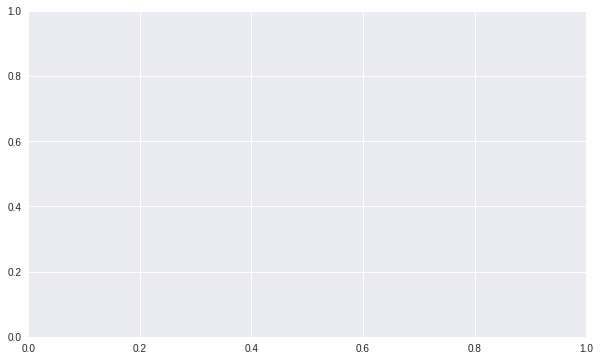

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history6.history['acc'], 'r',label='Train')
ax.plot(history6.history['val_acc'], 'b' ,label='Validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
ax.set_title(r'Training and Validation Accuracy vs. Epoch - resnet_md3', fontsize=20)
plt.savefig('resnet_md3_overfitting.png')

# Evaluate model

## overfit resnet

In [0]:
from keras.models import load_model
model_resnet_overfit=load_model('resnet_md3')

In [5]:
y_test=np.load('y_test_categorical.npy')
x_test_scaled=np.load('x_test_scaled_16.npy').T.swapaxes(1,3)
model_resnet_overfit.evaluate(x=x_test_scaled,y=y_test)

8580/8580 [==============================] - 129s 15ms/step


[4.852745181641657, 0.15034965034965034]

In [15]:
model_resnet_overfit.evaluate(x=x_train_normalized,y=y_train)

12000/12000 [==============================] - 175s 15ms/step


[5.020214734395345, 0.11825]

In [13]:
y_prob = model_resnet_overfit.predict(x_test_scaled) 
y_classes = y_prob.argmax(axis=-1)
y_classes.shape

(8580,)

## cnn_baseline

In [7]:
cnn_baseline=load_model('cnn_baseline')
cnn_baseline.evaluate(x=x_test_scaled,y=y_test)

8580/8580 [==============================] - 71s 8ms/step


[2.0520095469512585, 0.1850815850815851]